# Decord Video Reader Example

In [1]:
%matplotlib inline
import sys, os
sys.path.insert(0, os.path.abspath('../python'))
import decord as de
from matplotlib import pyplot as plt

#### Take a simple example video here

In [2]:
# using cpu in this example
ctx = de.cpu(0)
# example video
video = 'Javelin_standing_throw_drill.mkv'

## Video Reader is super easy to use with pythonic way to access frames

In [3]:
vr = de.VideoReader(video)  # using default resolution
print('Video frames #:', len(vr))
print('First frame shape:', vr[0].shape)

Video frames #: 303
First frame shape: (1080, 1920, 3)


## Sometimes its useful to control frame shape when the raw frames are super high resolution

We can utilize the libavfilter library to do frame resize for us

In [4]:
vr = de.VideoReader(video, width=640, height=480)
print('Frame shape:', vr[0].shape)

Frame shape: (480, 640, 3)


#### Random access can be plainfully slow, but decord use internal optimization to make sure we are not wasting a lot efforts here
The returned frame is in DLPack compatible NDArray format(used in TVM for example for example), which can be converted to numpy array. 

There is a bridging system in decord which automatically converts all outputs to Deep Learning framework compatible arrays, e.g., MXNet, PyTorch, Tensorflow. But in the meantime you can always retrieve the numpy array.

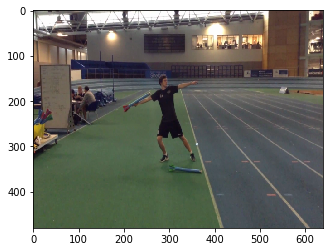

In [5]:
frame10 = vr[10].asnumpy()
plt.imshow(frame10)
plt.show()

#### Obtaining a bunch of frames all together is easy

In a single call we obtain a lot of frames, with less python overhead!

In [6]:
frames = vr.get_batch(range(0, len(vr) - 1, 5))
print(frames.shape)

(61, 480, 640, 3)


#### Automatic rotation

Automatic rotation based on video metadata (e.g., useful for iphone videos).

(568, 320, 3)


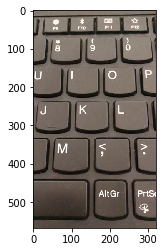

In [7]:
rotated_video = "../tests/test_data/video_90.mov"
vr = de.VideoReader(rotated_video)
frame = vr[0].asnumpy()
print(frame.shape)
plt.imshow(frame)
plt.show()

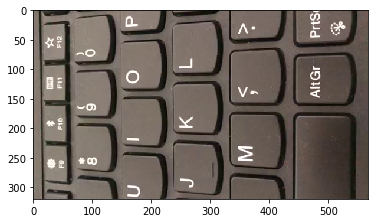

3.0

In [8]:
import cv2
cap = cv2.VideoCapture(rotated_video)
frame = cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.show()
cap.get(cv2.CAP_PROP_FRAME_COUNT)

## Or if you like OpenCV style

In [9]:
# seek to start
vr.seek(0)
# get next frame
next_frame = vr.next()
from functools import reduce
assert reduce(lambda x, y: x*y, next_frame.shape) > 1
# skip 100 frames
vr.skip_frames(100)